
Exercise 2.01: Loading and Preparing the Data for Analysis



In [ ]:
#import necessary library
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use ('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#read csv file or dataset files from github
rawbostondata = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [ ]:
#.head show the 5 first line of our file
rawbostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
#check for null values and drop them
rawbostondata = rawbostondata.dropna()

In [ ]:
#check for duplicate values and drop them
rawbostondata = rawbostondata.drop_duplicates()

In [ ]:
#make a list of the headers
list(rawbostondata.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [ ]:
#rename the headers with meaningful :) character by macking dictionary of headers
rawbostondata_rename = rawbostondata.rename (columns = {
   'CRIM': '1',
 ' ZN ': '2',
 'INDUS ': '3',
 'CHAS': '4',
 'NOX': '5',
 'RM': '6',
 'AGE': '7',
 'DIS': '8',
 'RAD': '9',
 'TAX': '10',
 'PTRATIO': '11',
 'LSTAT': '12',
 'MEDV': '13' 
})
rawbostondata_rename.head()

In [ ]:
#using .info help us to understand the type, count of non null, name of column of our data
rawbostondata_rename.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       506 non-null    float64
 1   2       506 non-null    float64
 2   3       506 non-null    float64
 3   4       506 non-null    int64  
 4   5       506 non-null    float64
 5   6       506 non-null    float64
 6   7       506 non-null    float64
 7   8       506 non-null    float64
 8   9       506 non-null    int64  
 9   10      506 non-null    int64  
 10  11      506 non-null    float64
 11  12      506 non-null    float64
 12  13      506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [ ]:
#.describe make a table of mean, std, min, 25%, 50%, 75%, max of our data
rawbostondata_rename.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
1,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
2,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
3,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
4,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
5,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
6,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
7,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
8,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
9,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
10,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
# in this part of code, we train the model and then test it.
X = rawbostondata_rename.drop('1', axis=1)
y = rawbostondata_rename [['1']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = test_data_size, random_state= seed)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.corr (method='pearson')

,2,3,4,5,6,7,8,9,10,11,12,13,1
2,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,-0.435827,0.422574,-0.198455
3,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,0.607457,-0.508338,0.387471
4,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,-0.041110,0.136831,-0.044587
5,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,0.603656,-0.453424,0.405813
6,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,-0.586573,0.666761,-0.167258
7,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,0.639881,-0.419062,0.355730
8,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,-0.522120,0.289658,-0.378997
9,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,0.456592,-0.383132,0.608838
10,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,0.528029,-0.478903,0.565035
11,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,0.374842,-0.503692,0.276530


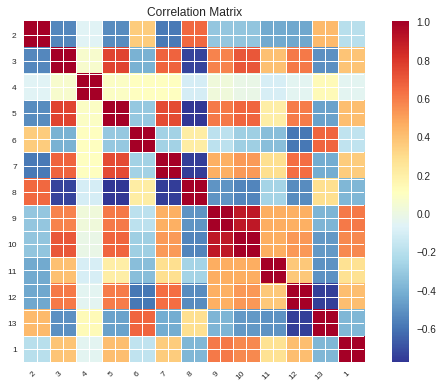

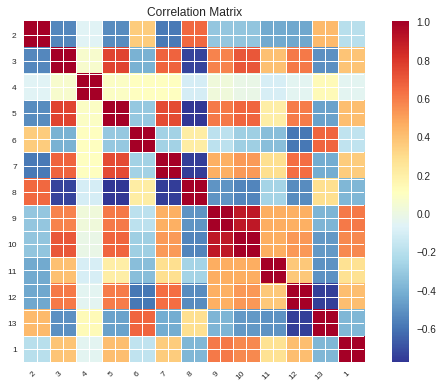

In [ ]:
#here we make a corralation matrix and show them with a plot
corrMatrix = train_data.corr (method='pearson')

xnames = list(train_data.columns)
ynames = list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames, title=None, normcolor=False, cmap='RdYlBu_r')

Exercise 2.02: Graphical Investigation of Linear Relationships Using Python

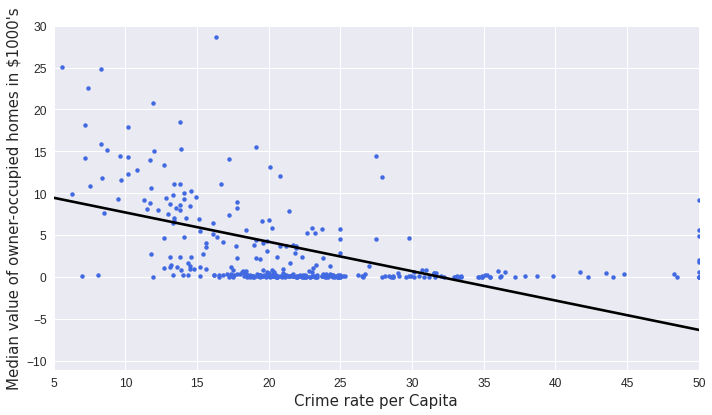

In [ ]:
# in this part, we show linear relationship of our data  
fig, ax = plt.subplots (figsize= (10,6))
sns.regplot (x= '13', y= '1', ci=None, data= train_data, ax= ax, color= 'k', scatter_kws= {'s':20, 'color':'royalblue', 'alpha':1})
ax.set_xlabel ('Crime rate per Capita', fontsize= 15, fontname= 'DejaVu Sans')
ax.set_ylabel ("Median value of owner-occupied homes in $1000's", fontsize= 15, fontname= 'DejaVu Sans')
ax.set_xlim (left= None, right= None)
ax.set_ylim (bottom= None, top= 30)
ax.tick_params(axis= 'both', which= 'major', labelsize= 12)
fig.tight_layout()

Examining a Possible Log-Linear Relationship Using Python

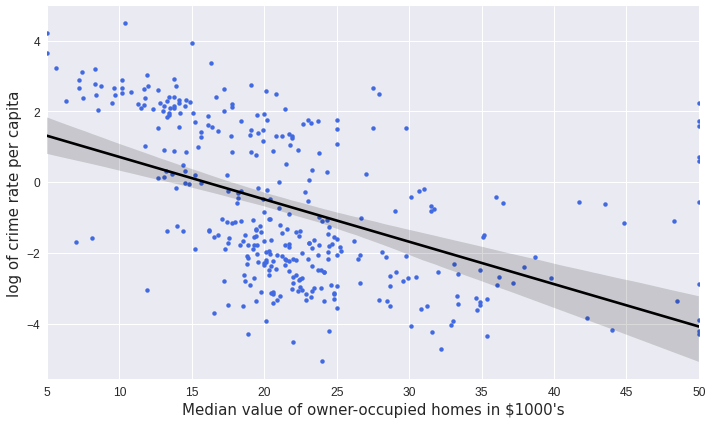

In [ ]:
# in this part, we show log-linear relationship of our data with 95% confidence interval
# we use seaborn (regplot) library to creat a log-linear plot and fit a regression line through it
fig, ax = plt.subplots (figsize= (10,6))
y = np.log (train_data ['1'])
sns.regplot (x = '13', y= y, ci= 95, data= train_data, ax= ax, color= 'k', scatter_kws= {'s': 20, 'color': 'royalblue', 'alpha': 1})
ax.set_ylabel ('log of crime rate per capita', fontsize= 15, fontname= 'DejaVu Sans')
ax.set_xlabel ("Median value of owner-occupied homes in $1000's", fontsize= 15, fontname= 'DejaVu Sans')
ax.set_xlim (left= None, right= None)
ax.set_ylim (bottom= None, top= None)
ax.tick_params (axis= 'both', which= 'major', labelsize= 12)
fig.tight_layout()